In [185]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Make Initial Dataframe

In [186]:
whatsapp_df = pd.read_fwf('_chat.txt', header = None)

whatsapp_df

,0,1,2
0,"[9/28/21, 7:07:33 PM] Tennis: ‎Messages and ca...",to,them.
1,"[10/11/21, 10:40:01 PM] ‎‎‪+1 (609) 423‑5488‬ ...",NaN,NaN
2,"[3/14/22, 6:14:43 PM] Adarsh Thakur: @18486674...",NaN,NaN
3,"[3/14/22, 6:14:59 PM] Ashrit Yarava: I'll chec...",NaN,NaN
4,"[3/14/22, 6:15:05 PM] Ashrit Yarava: My brothe...",NaN,NaN
...,...,...,...
800,"[7/15/22, 4:58:26 PM] Sriyaank Vadlamani: Lol ...",NaN,NaN
801,"[7/15/22, 4:58:45 PM] Adarsh Thakur: Yeah I ga...",NaN,NaN
802,"[7/15/22, 4:58:50 PM] Sriyaank Vadlamani: Lol",NaN,NaN
803,"[7/15/22, 4:59:20 PM] Pranav Gummaluri: Baumga...",NaN,NaN


Remove Secondary Lines of Mulitline Code (Temporary Solution)

In [187]:
whatsapp_df = whatsapp_df[whatsapp_df[0].str[0] == '[']
whatsapp_df

,0,1,2
0,"[9/28/21, 7:07:33 PM] Tennis: ‎Messages and ca...",to,them.
1,"[10/11/21, 10:40:01 PM] ‎‎‪+1 (609) 423‑5488‬ ...",NaN,NaN
2,"[3/14/22, 6:14:43 PM] Adarsh Thakur: @18486674...",NaN,NaN
3,"[3/14/22, 6:14:59 PM] Ashrit Yarava: I'll chec...",NaN,NaN
4,"[3/14/22, 6:15:05 PM] Ashrit Yarava: My brothe...",NaN,NaN
...,...,...,...
800,"[7/15/22, 4:58:26 PM] Sriyaank Vadlamani: Lol ...",NaN,NaN
801,"[7/15/22, 4:58:45 PM] Adarsh Thakur: Yeah I ga...",NaN,NaN
802,"[7/15/22, 4:58:50 PM] Sriyaank Vadlamani: Lol",NaN,NaN
803,"[7/15/22, 4:59:20 PM] Pranav Gummaluri: Baumga...",NaN,NaN


Reorganize Columns to contain the Message, Date and Time on Different Columns while Removing the Other Columns

In [188]:
whatsapp_df[['Datetime', 'Message']] = whatsapp_df[0].str.split('] ', n = 1, expand = True)
whatsapp_df['Datetime'] = whatsapp_df['Datetime'].str[1:]
whatsapp_df[['Date', 'Time']] = whatsapp_df['Datetime'].str.split(', ', expand = True)

whatsapp_df.drop(columns=[col for col in whatsapp_df if col not in ['Message', 'Date', 'Time']], inplace=True)
whatsapp_df

/Users/sriyaankvad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/var/folders/n1/h6bmhh_53cg_554zzrtbtl1c0000gn/T/ipykernel_91069/297536338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whatsapp_df['Datetime'] = whatsapp_df['Datetime'].str[1:]
/Users/sriyaankvad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Message,Date,Time
0,Tennis: ‎Messages and calls are end-to-end enc...,9/28/21,7:07:33 PM
1,‎‎‪+1 (609) 423‑5488‬ changed their phone numb...,10/11/21,10:40:01 PM
2,Adarsh Thakur: @18486674051 @17329972443 are ...,3/14/22,6:14:43 PM
3,Ashrit Yarava: I'll check brittany,3/14/22,6:14:59 PM
4,Ashrit Yarava: My brother got quail ridge,3/14/22,6:15:05 PM
...,...,...,...
800,Sriyaank Vadlamani: Lol I have no idea how to ...,7/15/22,4:58:26 PM
801,Adarsh Thakur: Yeah I gave it my best shot,7/15/22,4:58:45 PM
802,Sriyaank Vadlamani: Lol,7/15/22,4:58:50 PM
803,Pranav Gummaluri: Baumgartner,7/15/22,4:59:20 PM


Add User Column, Removing All Messages Not Sent By A User

In [189]:
whatsapp_df = whatsapp_df[whatsapp_df['Message'].str.contains(':') == True]
whatsapp_df[['User', 'Message']] = whatsapp_df['Message'].str.split(': ', n = 1, expand = True)
whatsapp_df

/Users/sriyaankvad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Message,Date,Time,User
0,‎Messages and calls are end-to-end encrypted. ...,9/28/21,7:07:33 PM,Tennis
2,@18486674051 @17329972443 are the nets up in ...,3/14/22,6:14:43 PM,Adarsh Thakur
3,I'll check brittany,3/14/22,6:14:59 PM,Ashrit Yarava
4,My brother got quail ridge,3/14/22,6:15:05 PM,Ashrit Yarava
5,Also,3/14/22,6:15:07 PM,Ashrit Yarava
...,...,...,...,...
800,Lol I have no idea how to spell it,7/15/22,4:58:26 PM,Sriyaank Vadlamani
801,Yeah I gave it my best shot,7/15/22,4:58:45 PM,Adarsh Thakur
802,Lol,7/15/22,4:58:50 PM,Sriyaank Vadlamani
803,Baumgartner,7/15/22,4:59:20 PM,Pranav Gummaluri


Extract Group Chat Name

In [190]:
group_chat_name = whatsapp_df.iloc[0]['User'] # This is the message WhatsApp sends about end to end encryption
whatsapp_df = whatsapp_df.iloc[1:,:] # Removes the message WhatsApp sends about end to end encryption
group_chat_name

'Tennis'

Remove Media

In [191]:
whatsapp_df = whatsapp_df[whatsapp_df['Date'].str[0] != '[']
whatsapp_df

,Message,Date,Time,User
2,@18486674051 @17329972443 are the nets up in ...,3/14/22,6:14:43 PM,Adarsh Thakur
3,I'll check brittany,3/14/22,6:14:59 PM,Ashrit Yarava
4,My brother got quail ridge,3/14/22,6:15:05 PM,Ashrit Yarava
5,Also,3/14/22,6:15:07 PM,Ashrit Yarava
6,Quail ridge is open,3/14/22,6:15:11 PM,Ashrit Yarava
...,...,...,...,...
800,Lol I have no idea how to spell it,7/15/22,4:58:26 PM,Sriyaank Vadlamani
801,Yeah I gave it my best shot,7/15/22,4:58:45 PM,Adarsh Thakur
802,Lol,7/15/22,4:58:50 PM,Sriyaank Vadlamani
803,Baumgartner,7/15/22,4:59:20 PM,Pranav Gummaluri


Find the User Who Sent the Most Messages

In [192]:
user_df = whatsapp_df.groupby('User', as_index = False).count().sort_values(by = 'Message')
user_df.drop(columns = ['Date', 'Time'], inplace = True)
user_df = user_df.rename(columns = {'User': 'User', 'Message': 'Messages Sent'})
user_df['Percentages'] = np.round(user_df['Messages Sent'].divide(other = (whatsapp_df.shape[0]/100)), 1)
user_df

,User,Messages Sent,Percentages
2,Fenil Gala,3,0.4
4,Om Deshmukh,10,1.3
3,Mayank Chauhan,36,4.6
6,Rut Mehta,78,10.0
7,Sriyaank Vadlamani,93,11.9
1,Ashrit Yarava,170,21.8
5,Pranav Gummaluri,180,23.1
0,Adarsh Thakur,209,26.8


Plot This Data

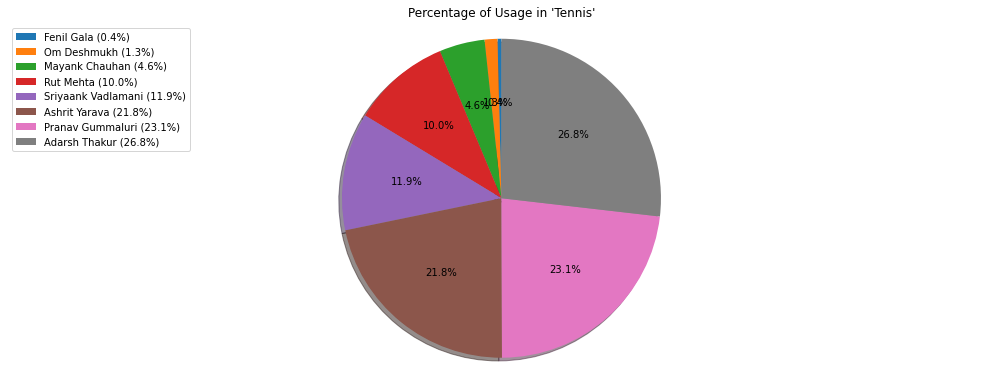

In [193]:
fig, ax = plt.subplots(figsize=(15,6))
fig.tight_layout(pad=3.0)
ax.pie(user_df['Percentages'], labels=['' for x in range(len(user_df))], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title(f'Percentage of Usage in \'{group_chat_name}\'')
plt.legend(loc="upper left", labels = user_df['User'] + ' (' + user_df['Percentages'].astype(str) + '%)'  )
plt.show()